### PS dilation
This section of code will demonstrate how it is possible to run a dilation filter without any HWA

In [1]:
import os
from PIL import Image
import cv2
import numpy as np
import time

#timer 
start_time = time.time()
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Load img and resize to look nice
img_og = cv2.imread(os.path.join(parent_dir, 'Peppers.jpg')) 
img = cv2.resize(img_og, (1920, 1080)) # To make sure

# Convert to binary
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, gray_img = cv2.threshold(gray_img, 127, 255, 0)

# Info
kernal = np.ones((5, 5), np.uint8)

dilated_image = cv2.dilate(gray_img, kernal)

print("Time taken: %s seconds " % (time.time() - start_time))
cv2.imwrite('Peppers_dilate.jpg', dilated_image)

Time taken: 0.9779071807861328 seconds 


True

The process of this code is:
* Find and specify path of image
* Resize for convenience sake so that it is easier to view
* Convert the image to a greyscale
* Derive the necerssary information from the greyscale then transform it into binary
    - If it is below the threshold of 127, it will transform to a 0
    - Otherwise, it will become 255 (the max value)
        - The reason for changing it to max instead of a binary 1 is for visualisation reasons, otherwise it would be too dark to see
* Apply single layer of dilation filter   
* Output final image out in seperate file
* Timer to visualise how long it takes on a pure PS implementation

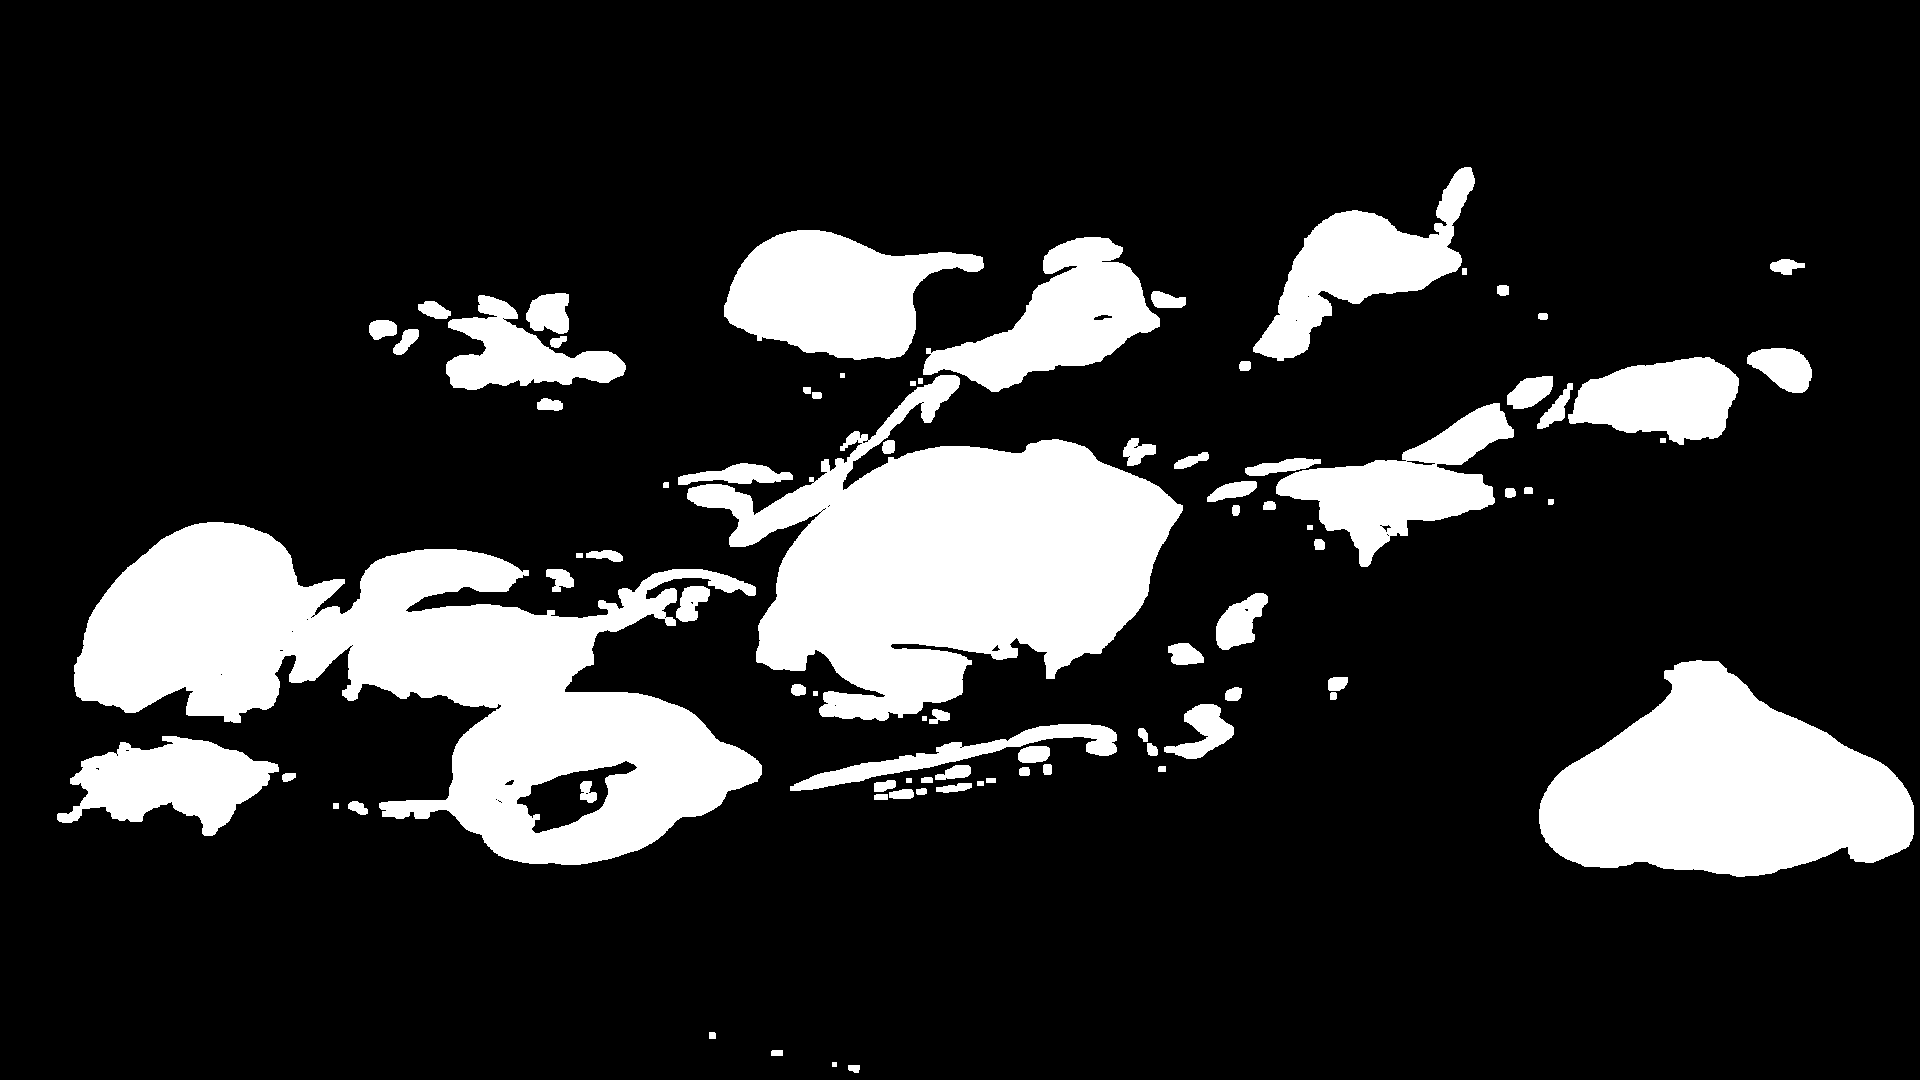

In [2]:
Image.fromarray(np.uint8(dilated_image), mode='P')